In [5]:
from collections import defaultdict
import itertools
import joblib
import numpy as np
import matplotlib as mpl
mpl.rc('figure', dpi=600)
mpl.rc('savefig', dpi=600)
%matplotlib inline
from matplotlib import pyplot as plt

# Load small-scale results.
res = joblib.load('../saved_data/pnl_results.pkl')
ns = np.concatenate([
    np.floor(np.linspace(200, 1000, 25)),
    np.floor(np.linspace(1001, 10000, 75))]).astype(int)

dims = [1]
complexities = [0]
methods = ['nn', 'rcit', 'kcit', 'kcipt', 'cci']

dim 1 compl 0


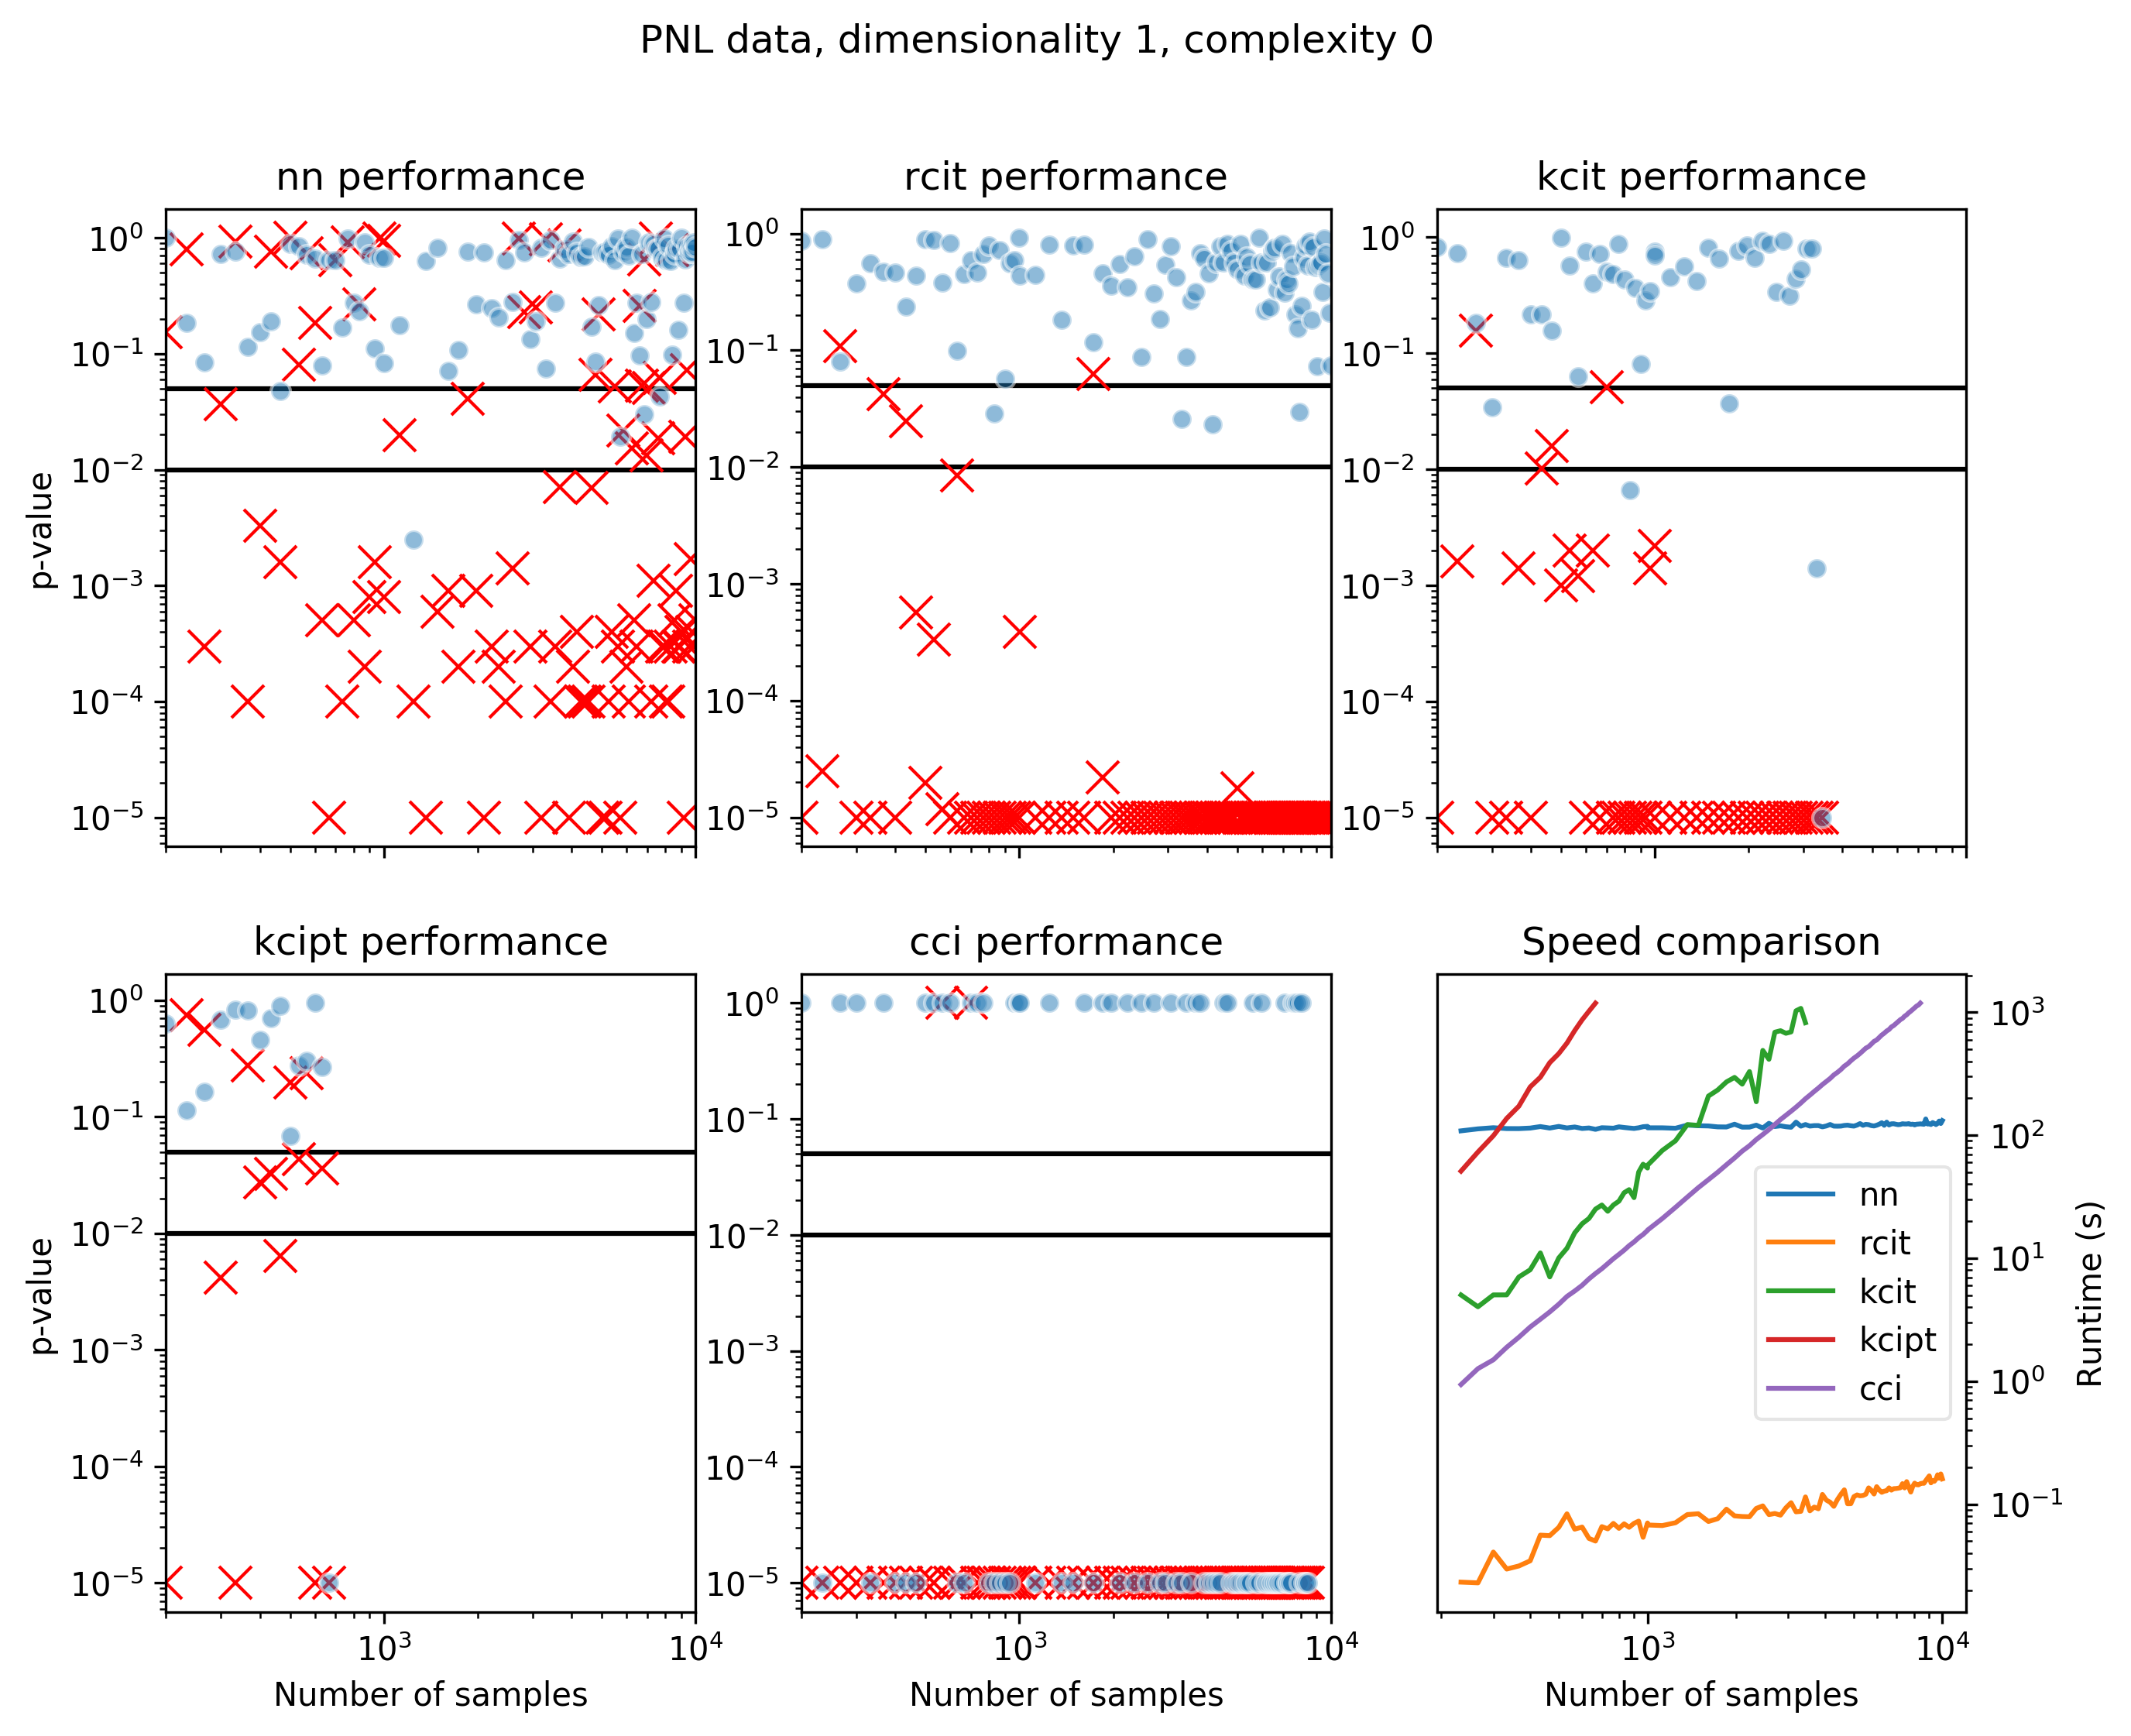

In [6]:
for dim, compl in itertools.product(dims, complexities):
    print('dim {} compl {}'.format(dim, compl))
    pvals_d = defaultdict(list)
    pvals_i = defaultdict(list)
    times = defaultdict(list)
    data_len = 100
    for mthd in methods:
        for n_samples in ns[:data_len]:
            results = np.array(res['{}_pnl_600mt_{}samples_{}dim_{}complexity'.format(
                        mthd, n_samples, dim, compl)])
            if results[0][0] >= 0:
                pvals_d[mthd].append(results[:, 0].mean())
                if results[:, 0].mean() < 1e-5:
                    pvals_d[mthd][-1] = 1e-5
                pvals_i[mthd].append(results[:, 1].mean())
                if results[:, 1].mean() < 1e-5:
                    pvals_i[mthd][-1] = 1e-5

                times[mthd].append(results[:, 2].mean())
            
    plt.figure(facecolor='white', figsize=(10, 8), dpi=300)
    plt.suptitle('PNL data, dimensionality {}, complexity {}'.format(
        dim, compl))
    for mthd_id, mthd in enumerate(methods):
        plt.subplot(2, 3, mthd_id+1)
        plt.title(mthd + ' performance')
        plt.xlim([ns[0], ns[-1]])
        data_len = len(pvals_d[mthd])

        plt.plot(ns[:data_len], pvals_d[mthd], 'rx', label = 'indep', markersize=10)
        plt.plot(ns[:data_len], pvals_i[mthd], 'o', label = 'dep', markeredgecolor='white', alpha=.5)


        plt.hlines(.05, 0, 10**6)
        plt.hlines(.01, 0, 10**6)

        plt.yscale('log')
        #plt.ylim([-.01, 1.01])
        #plt.ylim([1e-5, 1])
        plt.xscale('log')
        if mthd_id == 0 or mthd_id == 3:
            #plt.yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1])
            plt.ylabel('p-value')
        else:
            pass
            #plt.yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1], [])
        if mthd_id > 2:
            plt.xticks([1e3, 1e4])
            plt.xlabel('Number of samples')
        else:
            plt.xticks([1e3, 1e4], [])
            

    for mthd_id, mthd in enumerate(methods):
        ax=plt.subplot(2, 3, 6)
        plt.title('Speed comparison')
        try:
            t = times[mthd]
            t[t < 0] = np.nan
            n_data = len(pvals_i[mthd])
            plt.plot(ns[:n_data], times[mthd], label=mthd)
            plt.yscale('log')
            plt.xscale('log')
            plt.xlabel('Number of samples')
            plt.ylabel('Runtime (s)')
            legend = plt.legend(loc=0)
            legend.get_frame().set_alpha(0.5)
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position("right")
        except IndexError:
            pass